# 1) Overview of the data and import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Load dataset

In [2]:
data_fb = pd.read_csv("FB_data.csv")

data_fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/20/2019,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
1,6/21/2019,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2,6/24/2019,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
3,6/25/2019,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
4,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600


In [3]:
data_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


# 3) EDA - Exploratory Data Analysis

In [4]:
data_fb.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data_fb.duplicated().sum()

0

This means that the data is cleaned let`s get started

In [6]:
data_fb.index

RangeIndex(start=0, stop=253, step=1)

In [7]:
data_fb = data_fb.replace(",","",regex=True)

In [8]:
data_fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,195.771304,198.223637,193.238143,195.928419,195.928419,1.795714e+07
std,18.912673,18.630595,19.295351,19.033137,19.033137,8.708030e+06
min,139.750000,148.179993,137.100006,146.009995,146.009995,6.046300e+06
25%,184.619995,186.729996,182.559998,185.130005,185.130005,1.176170e+07
50%,194.699997,197.070007,192.740005,194.470001,194.470001,1.534030e+07
75%,207.020004,210.380005,205.309998,207.789993,207.789993,2.166420e+07
max,240.960007,241.210007,235.550003,238.789993,238.789993,5.016290e+07


# Data Visualization
1) Create a new column profit to store the profit when the stock opens

In [9]:
data_fb["profit"] = data_fb["Close"] - data_fb["Open"]
data_fb

,Date,Open,High,Low,Close,Adj Close,Volume,profit
0,6/20/2019,190.949997,191.160004,187.639999,189.529999,189.529999,14635700,-1.419998
1,6/21/2019,188.750000,192.000000,188.750000,191.139999,191.139999,22751200,2.389999
2,6/24/2019,192.419998,193.979996,191.570007,192.600006,192.600006,15509000,0.180008
3,6/25/2019,192.880005,193.139999,188.130005,188.839996,188.839996,16750300,-4.040009
4,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600,-1.879989
...,...,...,...,...,...,...,...,...
248,6/15/2020,225.089996,233.770004,224.800003,232.500000,232.500000,15340300,7.410004
249,6/16/2020,237.139999,238.460007,233.000000,235.649994,235.649994,15236700,-1.490005
250,6/17/2020,235.000000,237.589996,231.729996,235.529999,235.529999,19552800,0.529999
251,6/18/2020,234.990005,236.139999,232.149994,235.940002,235.940002,15782500,0.949997


In [10]:
data_fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'profit'],
      dtype='object')

2.Plot the distribution of the Open prices over time to see the stock's trend:

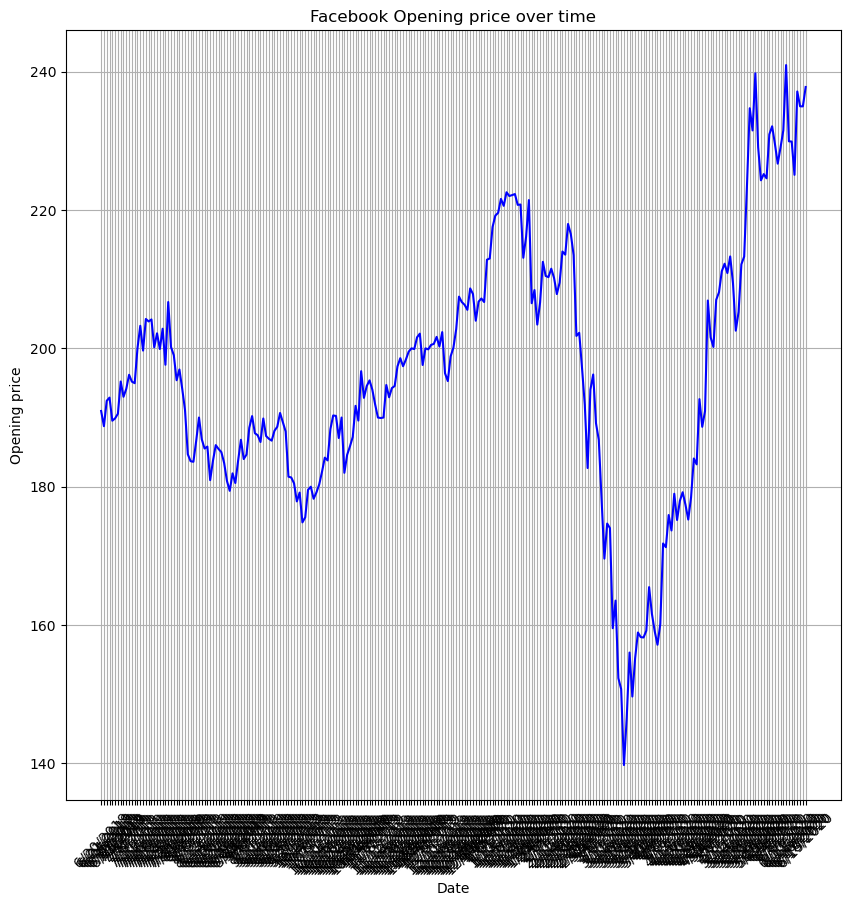

In [11]:
plt.figure(figsize=(10,10))
plt.plot(data_fb["Date"],data_fb["Open"],color="blue")
plt.xlabel("Date")
plt.ylabel("Opening price")
plt.title("Facebook Opening price over time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3.Plot the volume of trades over time to observe any significant changes in trading activity:

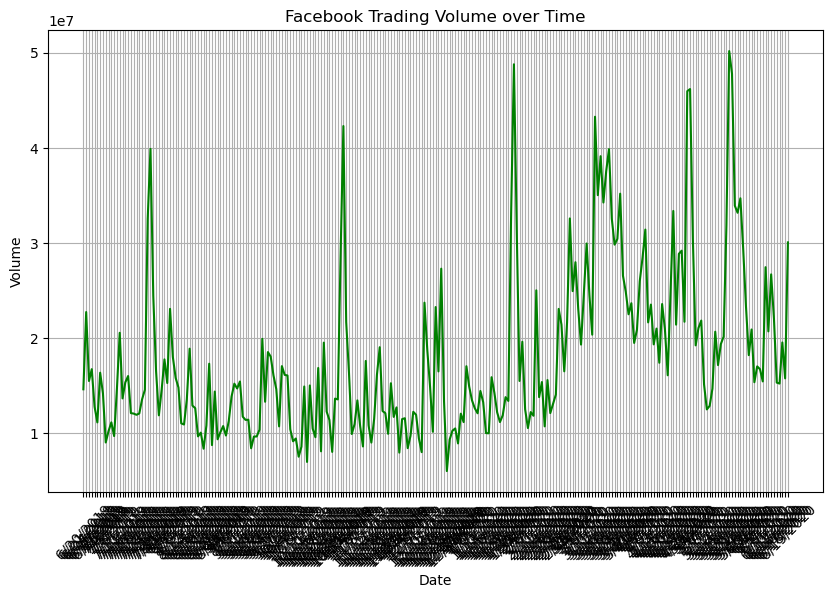

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data_fb['Date'], data_fb['Volume'], color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Facebook Trading Volume over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

4.Relationship between 'Open' and 'Close' prices for Facebook's stock.

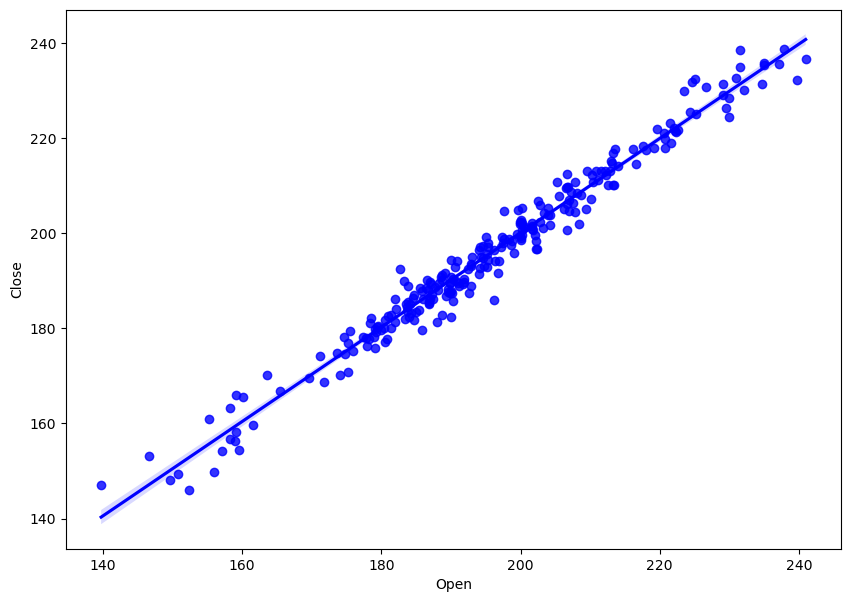

In [13]:
plt.figure(figsize=(10,7))
sns.regplot(x=data_fb["Open"],y=data_fb["Close"],color="b")
plt.show()

5) Histogram of the profit

<Axes: xlabel='profit', ylabel='Count'>

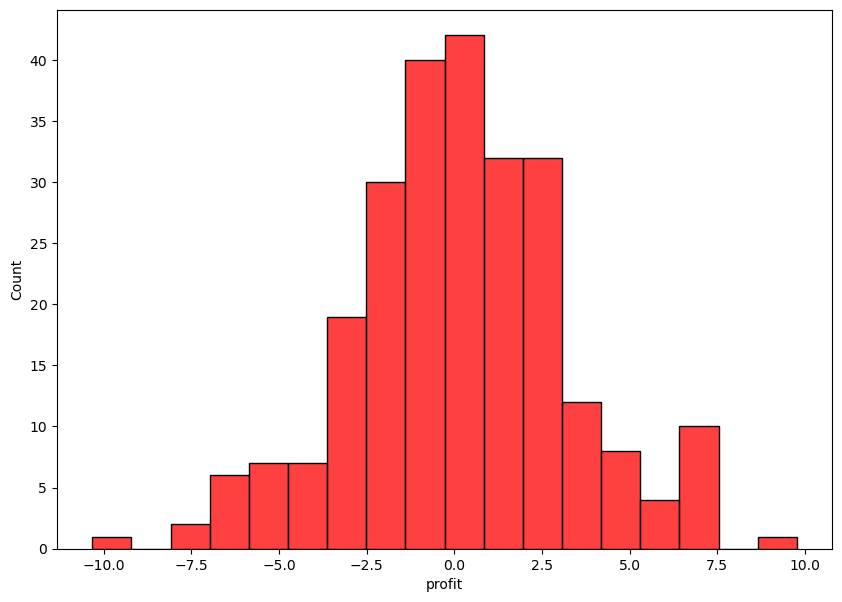

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(data_fb["profit"],color="r")

6) Open prices distribution

C:\Users\kirol\AppData\Local\Temp\ipykernel_13440\438204930.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_fb["Open"],shade=True,color="b")


<Axes: xlabel='Open', ylabel='Density'>

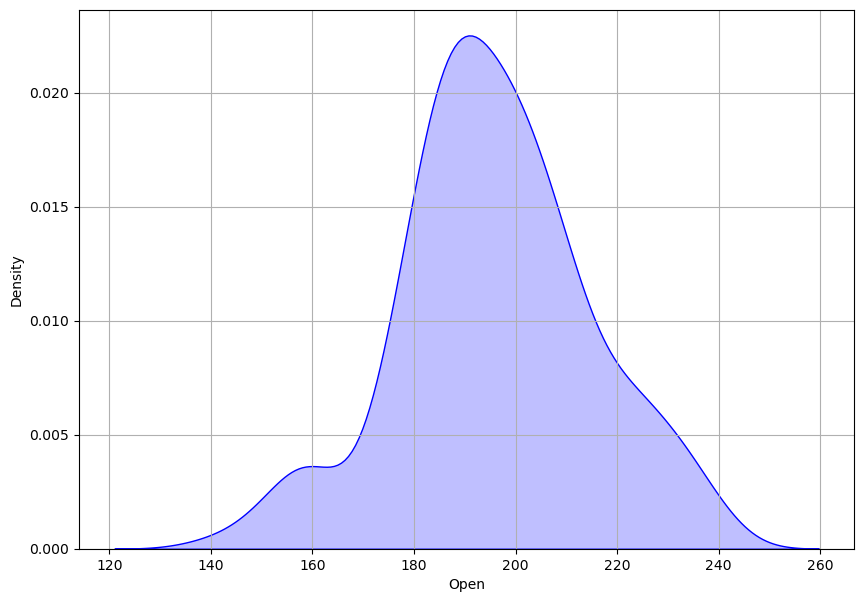

In [15]:
plt.figure(figsize=(10,7))
plt.grid()
sns.kdeplot(data_fb["Open"],shade=True,color="b")

7. Relationship between the 'High' prices and the 'Profit' values

<Figure size 1000x700 with 0 Axes>

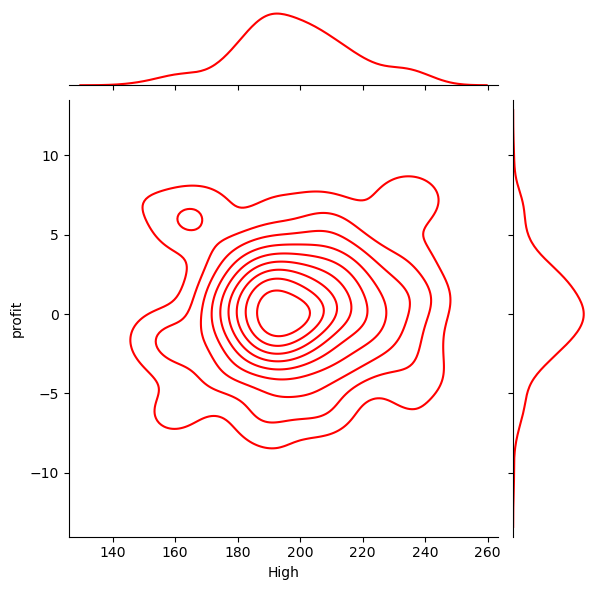

In [16]:
plt.figure(figsize=(10,7))
sns.jointplot(x=data_fb["High"],y=data_fb["profit"],kind="kde",color="r")

8. plot the relationship between the profit and the opening price of Facebook's stock

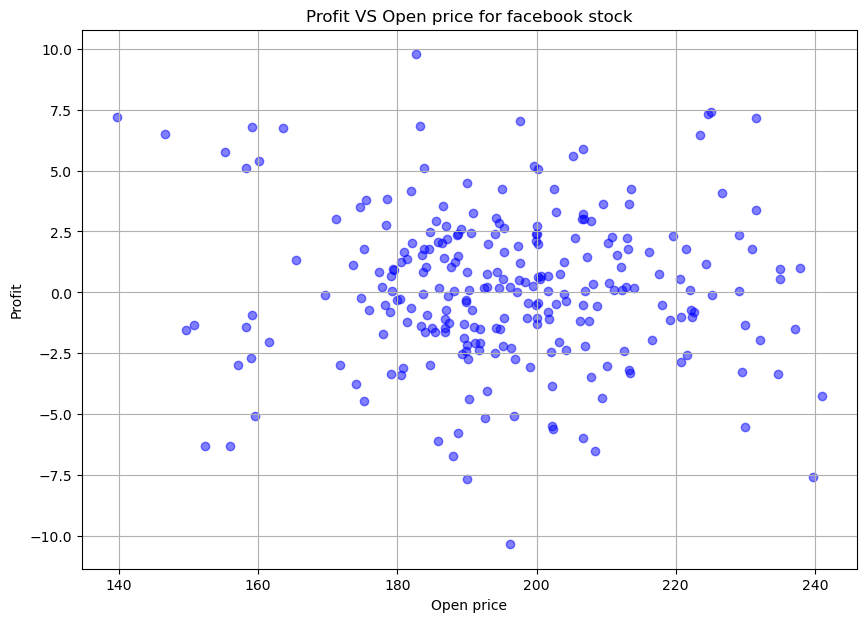

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(data_fb["Open"],data_fb["profit"],color="b",alpha=0.5)
plt.xlabel("Open price")
plt.ylabel("Profit")
plt.title("Profit VS Open price for facebook stock")
plt.grid()
plt.show()

9. plot the relationship between the profit and the closing price of Facebook's stock

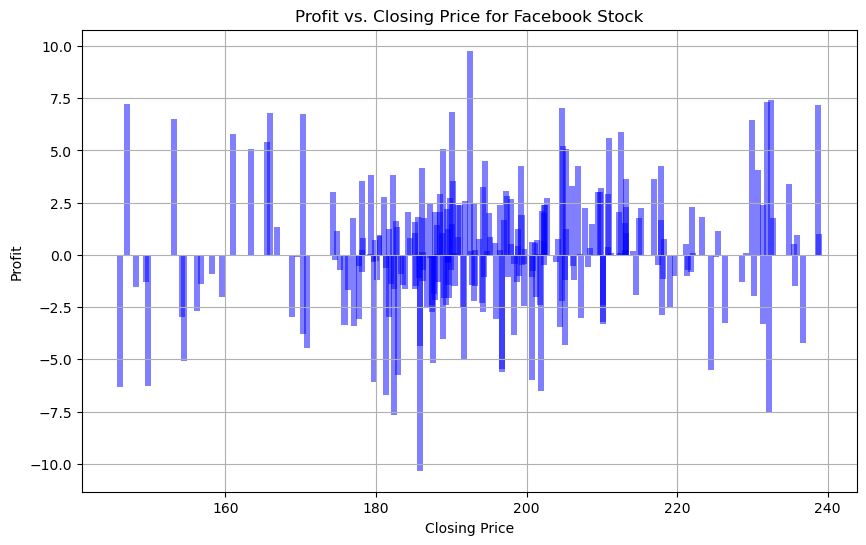

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(data_fb['Close'], data_fb['profit'], color='b', alpha=0.5)
plt.xlabel('Closing Price')
plt.ylabel('Profit')
plt.title('Profit vs. Closing Price for Facebook Stock')
plt.grid(True)
plt.show()

10.create a correlation matrix

C:\Users\kirol\AppData\Local\Temp\ipykernel_13440\917840337.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_fb.corr()


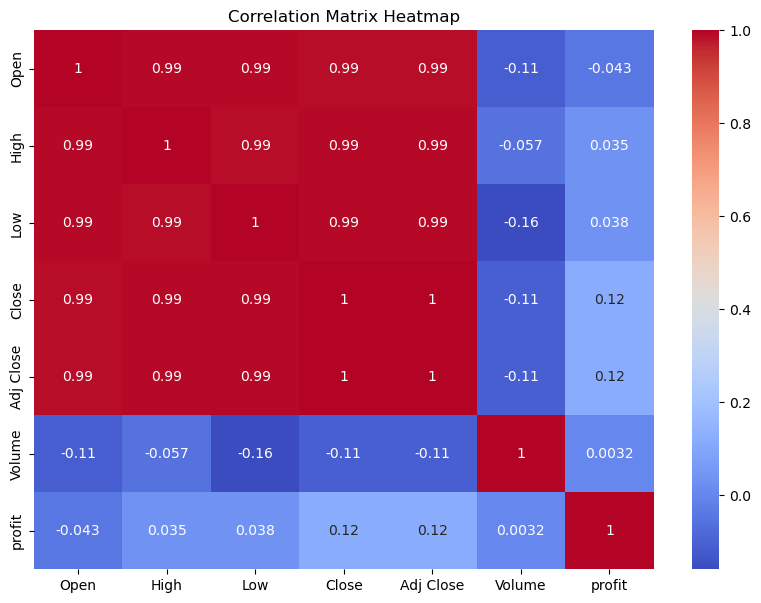

In [19]:
selected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'profit']
subset_fb = data_fb[selected_columns]

#calculate corr matrix
correlation_matrix = subset_fb.corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:
#data_fb.to_csv("FaceBook_dataset.csv")
#if you want to save the excel file